<a href="https://colab.research.google.com/github/emmanueltiti/week-7-IP/blob/main/week_7_core_ip_Emmanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

In efforts to increase sales of houses Hass consulting company has tasked me with creating aproper model that can predict the price of a house for sale in view of the given dataset.

### b) Defining the Metric for Success

We choose to use the root squred mean as a metric to guage our model success in that, root squared meqn greater than 85% symbolizes our model performs well and lower than 50% is jus poor performing model. 

### c) Understanding the context

Development of thus model will be useful for the company in matters where to build what kind of houses,price estimates for houses we want to buy and alot more.This will also strengthen the company's marketing force and ensure continued excellence years to come.

### d) Recording the Experimental Design

### e) Data Relevance

Our data contains important determinants for housing prices such as the perking lot space,living area size ,number of bedrooms and alot others that will be impactful in making this model.

## 2. Reading the Data

In [5]:
#Importing files to be used 
import numpy as np 
import pandas as pd


In [6]:
# Loading the Dataset
# Dataset url = http://bit.ly/IndependentProjectWeek7Dataset
data=pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## 3. Checking the Data

In [7]:
# Determining the no. of records in our dataset
#
data.shape

(21613, 20)

In [8]:
# Previewing the top of our dataset
#
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# Previewing the bottom of our dataset
# 
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [10]:
# Checking whether each column has an appropriate datatype
#
data.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

From the above cell we notice that some columns have data types that are not appropriately assigned. The id and year columns need to be changed into appropriate data types.

In [11]:
# id should be and object since it acts as a name for a certain unit
data['id']= data['id'].astype('object')
data.dtypes

id                object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## 5. Tidying the Dataset

Outliers 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


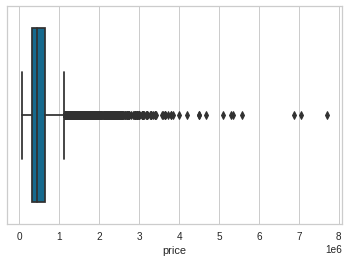

In [12]:
# Checking for Outliers
## Box Plot will show if our dependent variable has any outliers
import seaborn as sns
sns.boxplot(data['price'])


Our price colunn seems to have alot of outliers  but in this case luxurius houses do exist and hence we cannot remove our outliers as they represent high end luxurious properties that may fetch huge sums exceeding the interquatile range displayed by our data.

Normality test

(array([1.9021e+04, 2.1420e+03, 3.2200e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <a list of 10 Patch objects>)

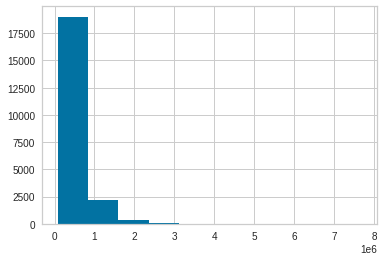

In [13]:
import matplotlib.pyplot as plt
plt.hist(data['price'])


We see that our price columns data does not have a uniform distribution. The data from price column is skwed to the left

In [14]:
# Identifying the Missing Data
#
data.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Our data has no null values 

## 6. Exploratory Analysis

Univariate analysis

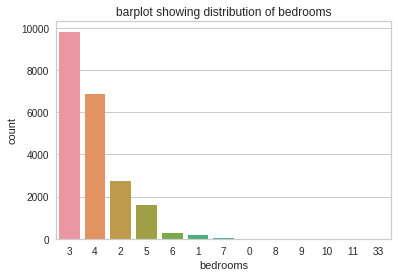

In [15]:
# Ploting the univariate summaries and recording our observations
#count plot of bedrooms
import seaborn as sns
sns.countplot(x ='bedrooms', data = data, order=data['bedrooms'].value_counts().index)
plt.title('barplot showing distribution of bedrooms')
plt.show()

Most of the houses have 3 bedrooms 

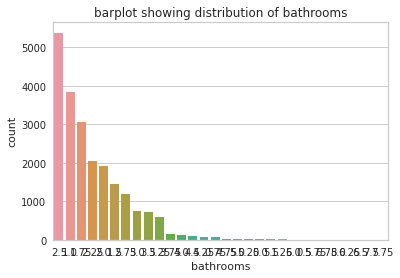

In [16]:
#count plot of bathrooms
sns.countplot(x ='bathrooms', data = data, order=data['bathrooms'].value_counts().index)
plt.title('barplot showing distribution of bathrooms')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

  Most houses have 2.5 bathrooms

In [17]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Plot showing relation btn living area and price')

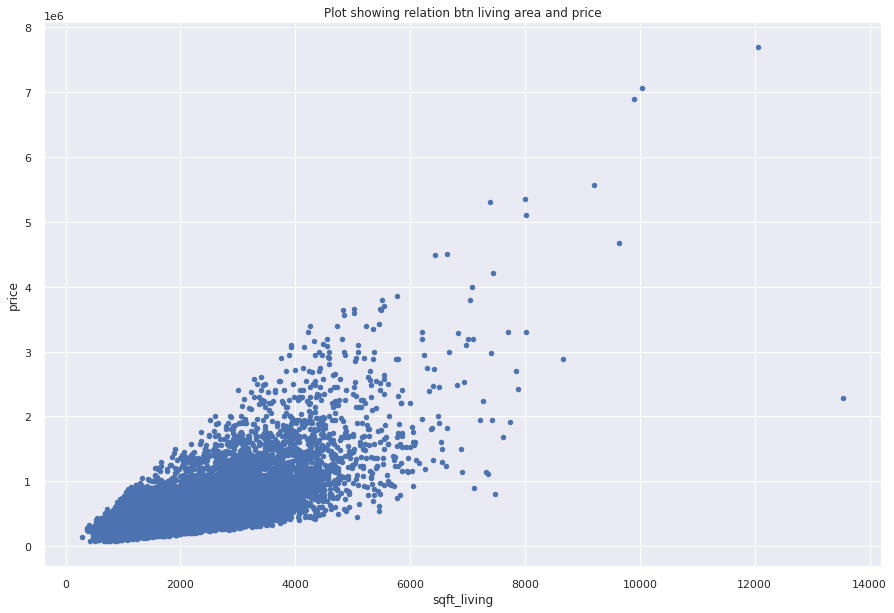

In [18]:
data.plot.scatter(x='sqft_living', y='price')
plt.title('Plot showing relation btn living area and price')

There is a positive coorelation between the living area size and the price of the property'the lager the living area the more the price. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Plot showing relation btn parking layout in square feet and price')

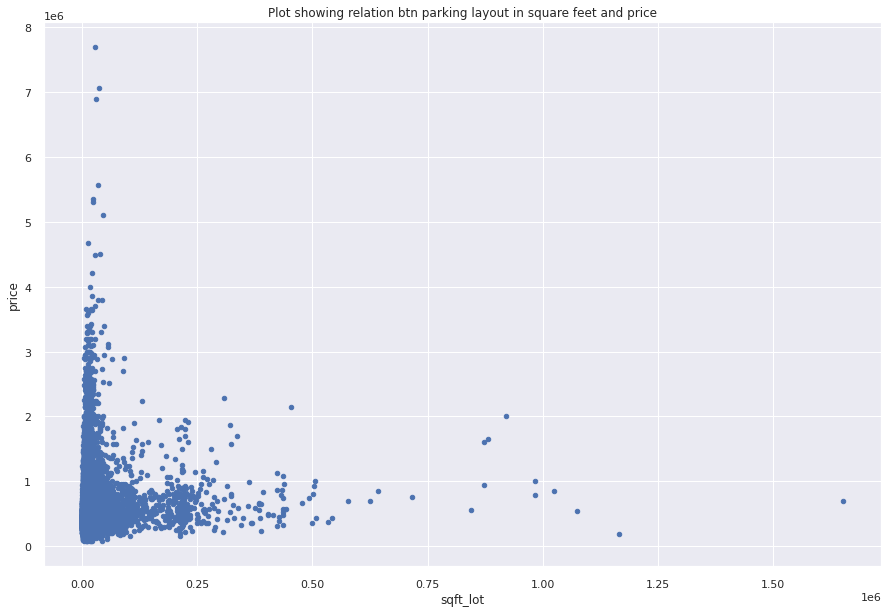

In [19]:
data.plot.scatter(x='sqft_lot', y='price')
plt.title('Plot showing relation btn parking layout in square feet and price')

The relationship between the parking space area and the house price seems to be non-linear and almost negative correlation.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Plot showing relation btn basement area size and price')

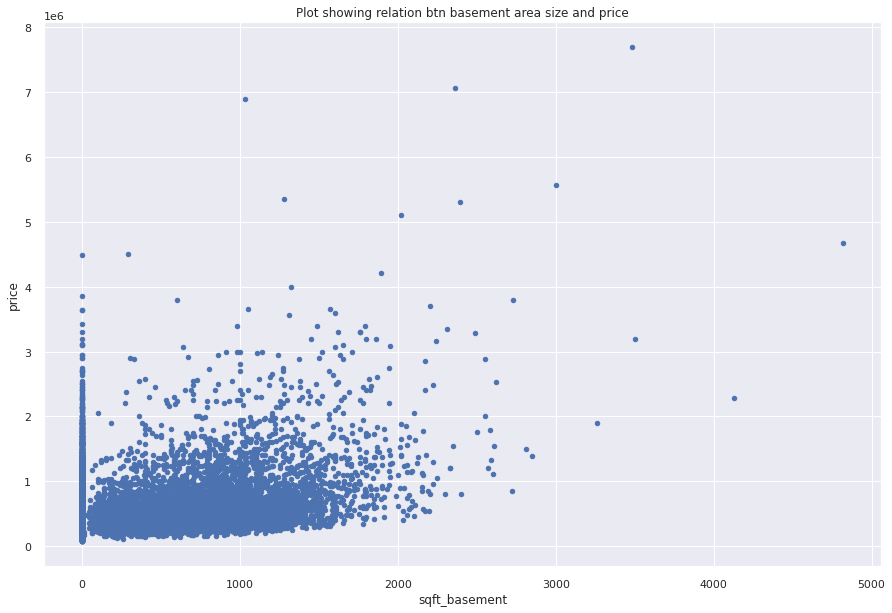

In [20]:
data.plot.scatter(x='sqft_basement', y='price')
plt.title('Plot showing relation btn basement area size and price')

From the plot we can see that an increase in basesment space also positively contributes to the price of the house.

We could filter our data set to obtain houses that mare expensive ,in this case lets say houses worth 1 million and over are our luxurious houses.

In [21]:
#data_lux now contains our luxurious houses
data_lux=data[data['price']>=1000000]
data_lux.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
21,2524049179,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
49,822039084,1350000.0,3,2.50,2753,65005,1.0,1,2,5,9,2165,588,1953,0,98070,47.4041,-122.451,2680,72513
69,1802000060,1330000.0,5,2.25,3200,20158,1.0,0,0,3,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
70,1525059190,1040000.0,5,3.25,4770,50094,1.0,0,0,4,11,3070,1700,1973,0,98005,47.6525,-122.160,3530,38917


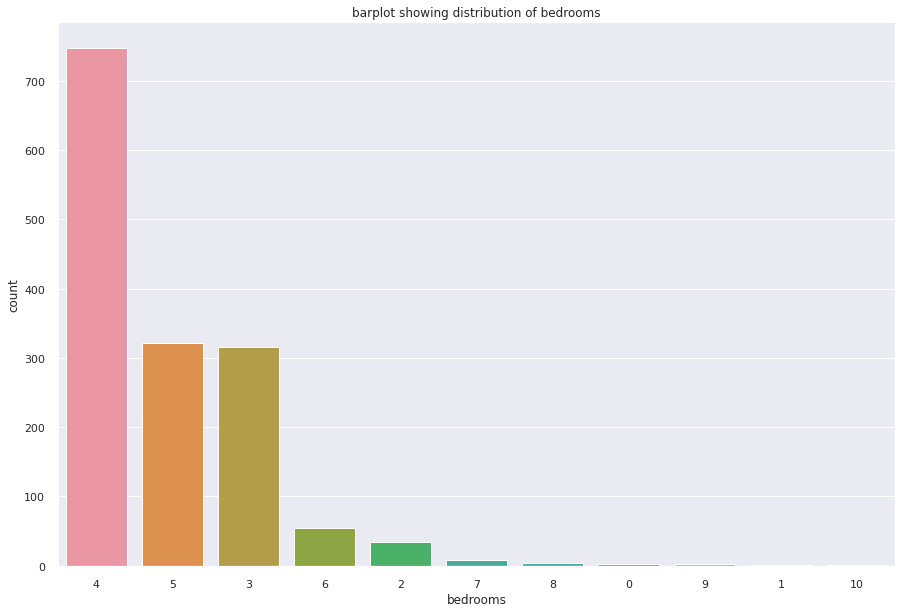

In [22]:
import seaborn as sns
sns.countplot(x ='bedrooms', data = data_lux, order=data_lux['bedrooms'].value_counts().index)
plt.title('barplot showing distribution of bedrooms')
plt.show()

We can see more bedrooms does not mean higher prices so does the number of bathrooms as seen below.

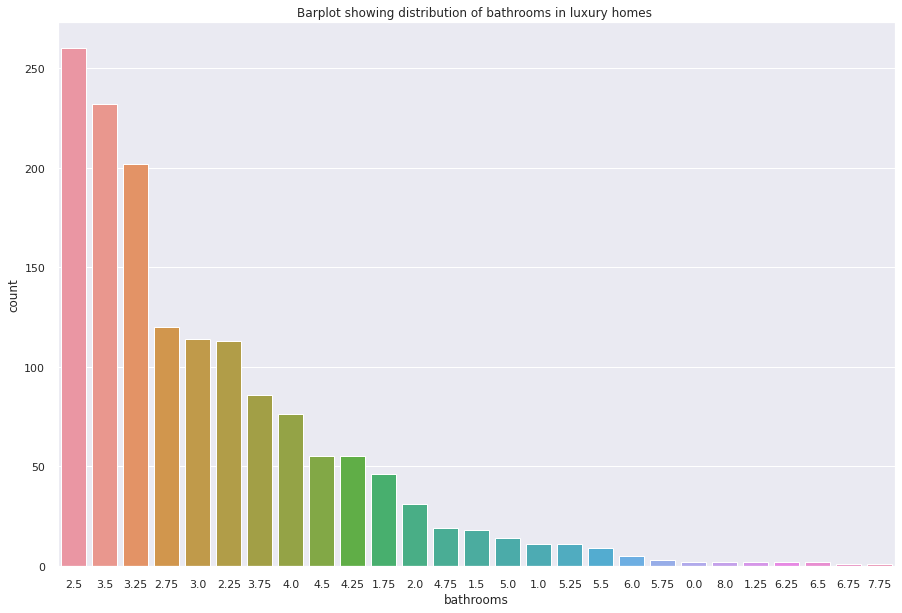

In [23]:
sns.countplot(x ='bathrooms', data = data_lux, order=data_lux['bathrooms'].value_counts().index)
plt.title('Barplot showing distribution of bathrooms in luxury homes ')
sns.set(rc = {'figure.figsize':(15,10)})
plt.show()

In [24]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


Text(0.5, 1.0, 'Heat map of coorelation in our variables')

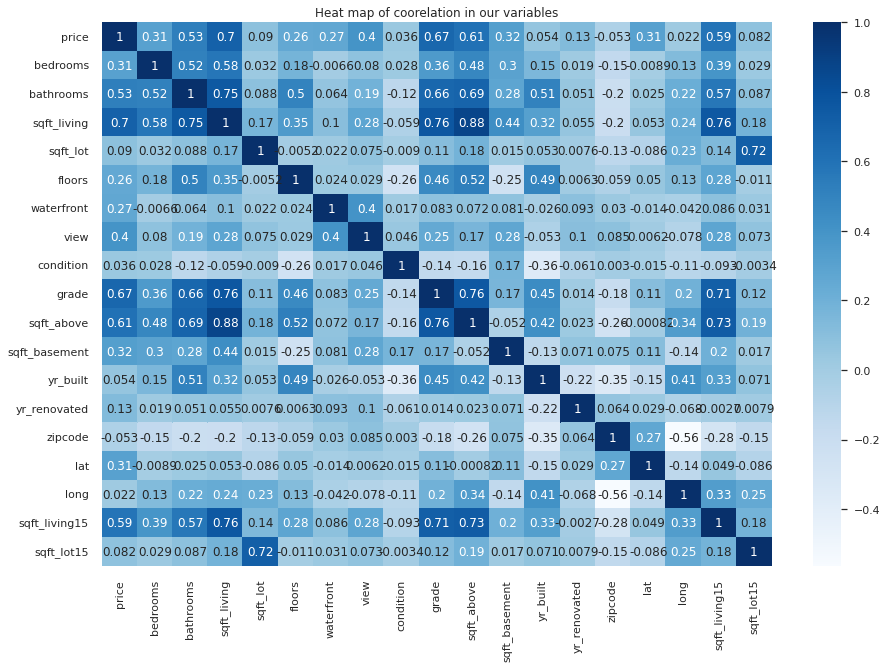

In [25]:
dataplot = sns.heatmap(data.corr(), cmap="Blues", annot=True)
plt.title('Heat map of coorelation in our variables')

**Coorelation in our variables**

From the above heat map we can see correlation coefficients of each variable against another.We know that Price is our dependent variable and from the heat map we can identify variables with ther leeast coefficient and ommit them from our x variables when creating our models.We could say that we ommit all variables whose coorelation coeficient againt price is less than 0.3.

We can also see that there is heteroscedasticity in our data as some of our indipendent variables have high coorelation .


## 7. Implementing the Solution

Feature selection 

Now we can choose the variables tha will be impactful in making our models

In [26]:
#making our final data set
#data.drop(data.columns[[5,6,7,9,13,14,15,16,17,19]], axis = 1, inplace = True)
data.head()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


**Multiple linear regression**

Assigning values 

In [28]:
##W define our x and y variables
x=data.drop(['price'], axis=1).values
y=data['price'].values

In [29]:
print(y)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


Spliting our data set in to training and testing

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

Training the data

In [31]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [32]:
y_pred=regressor.predict(x_test)
print(y_pred)


[ 373263.04758417  575300.27198512 -526547.53617528 ... 1024668.15761069
  468261.26974483  582521.45541559]


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)  

0.7028889180104629

In [34]:
accuracy1=regressor.score(x_train,y_train)
print(accuracy1)

0.6984358018473129


In [35]:
accuracy=regressor.score(x_test,y_test)
print(accuracy)

0.7028889180104629


Our model give an r2 score od 68% which is not so good .to in crease this we will need to in crease the number of x variables.We can also see that our model has not caused over fitting since the r2 score for the train set is almost similar to the test set hence .If our training set had a significantly higher score than the test set then that would indicate overfitting .Lasso regression would help solve that.

Text(0.5, 1.0, 'actual vs predicted')

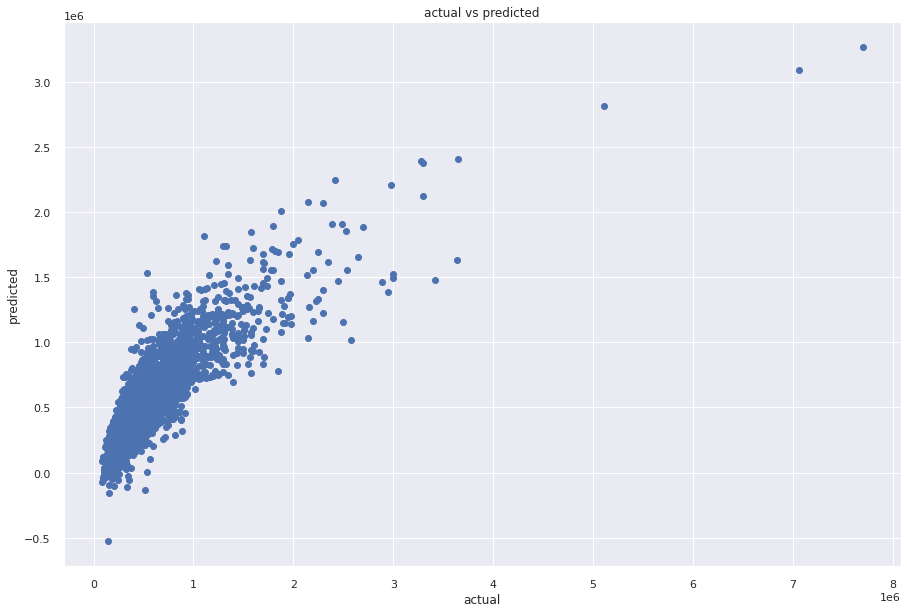

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('actual vs predicted')

**Quantile regression**

This type of regression will be very usefull for making models from this data set especially since we determined there is heteroscedasticity in our data frame.

In [37]:
X=data.drop(['price'], axis=1).values
Y=data['price'].values

In [38]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression(fit_intercept = True, normalize = False)
model1.fit(x, y)

y_pred1 = model1.predict(X)

print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred1 - y) ** 2)))
print('Variance score: {0:.2f}'.format(model1.score(x, x)))


Mean squared error: 40504545596.74


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


ValueError: ignored

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

**Lasso regression**

In [43]:
from sklearn import linear_model
lasso_reg=linear_model.Lasso(alpha=50, max_iter=100,tol=0.1)
lasso_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.738e+14, tolerance: 2.025e+14
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=50, max_iter=100, tol=0.1)

In [44]:
lasso_reg.score(X_test,Y_test)

0.6878708034116506

In [45]:
lasso_reg.score(X_train,Y_train)

0.7045880734084217

lasso regression also gives an accuracy performance of 58% like the  multilinear model.Lets try the ridge regressin

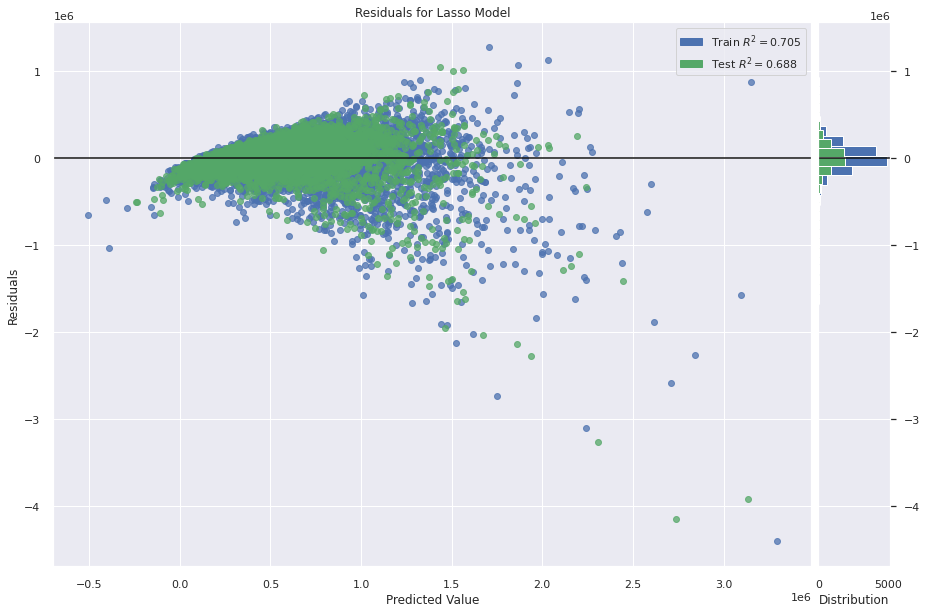

In [59]:
##residual plots
from yellowbrick.regressor import ResidualsPlot
visualizer=ResidualsPlot(lasso_reg)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()


**Ridge regression**

In [46]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50, max_iter=100,tol=0.1)
ridge_reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=4.02555e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=50, max_iter=100, tol=0.1)

In [47]:
ridge_reg.score(X_test,Y_test)

0.6854097881754477

In [48]:
ridge_reg.score(X_train,Y_train)

0.7012053378028024

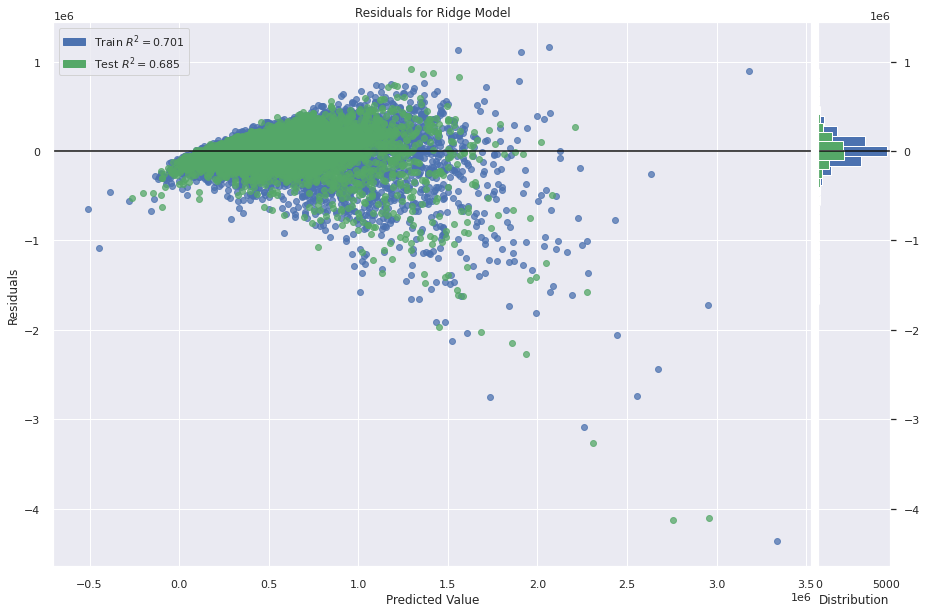

In [60]:
#ploting residuals
visualizer=ResidualsPlot(ridge_reg)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()


**Elastic Net Regression**


This regression is a hybrid combination of the lasso and ridge regression, it should help us remove variables with very weak corelation to our dependent variable making the model perform better.

In [49]:
#importing libraries to be used
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [50]:
#assigning 
X=data.drop(['price'], axis=1).values
Y=data['price'].values

In [51]:
enet=ElasticNet(alpha=1.0,l1_ratio=0.5)
enet.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.069e+14, tolerance: 2.025e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet()

In [52]:
Y_pred=enet.predict(X_test)
Y_pred

array([ 309125.31614716, 1417217.44725407,  496899.53362672, ...,
        464520.92446709,  307201.35451023,  294974.03921502])

In [53]:
enet.score(X_test,Y_test)

0.612957804122565

In [54]:
enet.score(X_train,Y_train)

0.623056158624692

Plotting residuals 


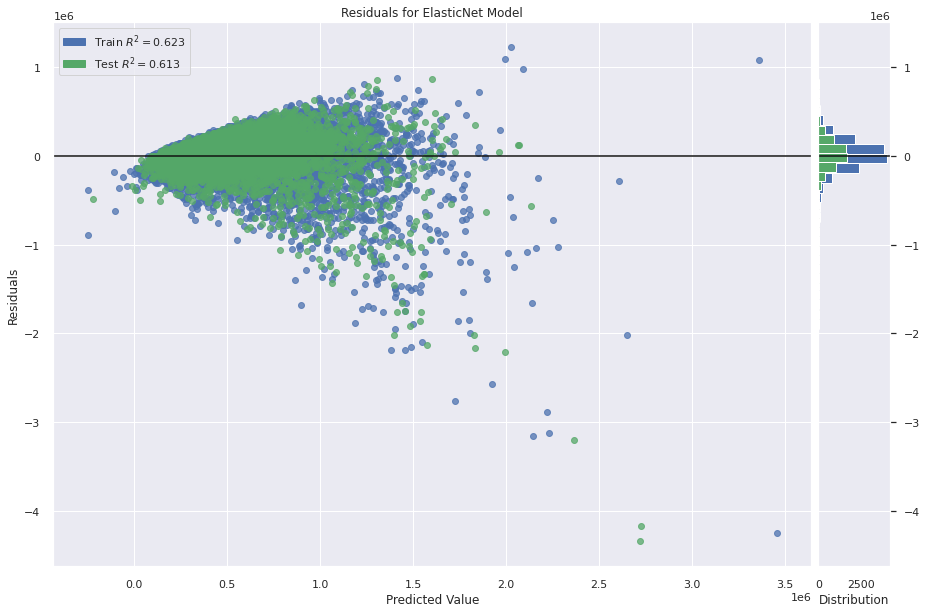

In [57]:
visualizer=ResidualsPlot(enet)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.poof()


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

Our data was not that good interms of making a good prediction model.It made models with less tha 80% accuracy which was not our target percentage.

### b). Do we need other data to answer our question?
Additional variables may be neceesary in trying to increase the accuracy of our models.

### c). Did we have the right question?

Our research/ problem question was properly formulated.